In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [2]:
path = "/Users/mattmacrides/Personal-Projects/Customer Segmentation 2 - Clustering/"
df = pd.read_csv(path + 'Customers.csv', sep=',', decimal='.')
df.head(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


Let's look at a 3 variables to try to cluster: Age, Annual Income, and Spending Score.

In [25]:
X = df.iloc[:, [2, 3, 4]].values
# Create an instance of the StandardScaler
scaler = StandardScaler()
# Fit the scaler to the data and transform the features
X = scaler.fit_transform(X)

Fit the model from 1 to 11 clusters.

In [26]:
k_values = range(1, 11)
wcss = [] 
for k in k_values: 
    kmeans = KMeans(n_clusters = k, n_init = 10, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

Plotting the elbow curve

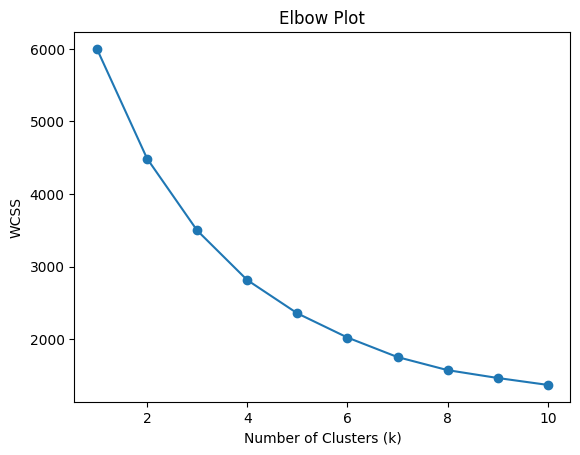

In [24]:
# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

We see that the elbow is when cluster = 4. Let's fit the model here and predict y.

In [27]:
kmeans = KMeans(n_clusters = 4, n_init = 10, init = "k-means++", random_state = 42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's unscale the data to properly visualize.

Max, Min, and Mean Values for Each Axis in Each Cluster:


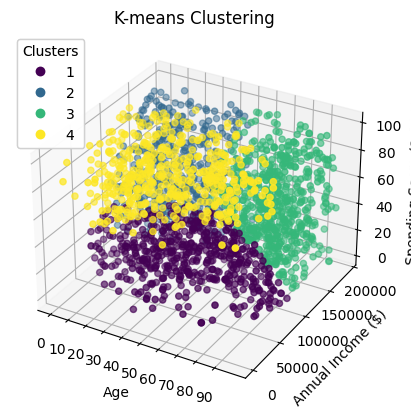

In [28]:
# Unscaled the scaled data
X = scaler.inverse_transform(X)

# Assuming you have the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to your original data
data_with_clusters_3d = pd.DataFrame(df, columns=['Age', 'Annual Income ($)', 'Spending Score (1-100)'])
data_with_clusters_3d['Cluster'] = cluster_labels + 1


# Calculate max, min, and mean values for each axis in each cluster
cluster_summary = data_with_clusters_3d.groupby('Cluster').agg({
    'Age': ['min', 'max', 'mean'],
    'Annual Income ($)': ['min', 'max', 'mean'],
    'Spending Score (1-100)': ['min', 'max', 'mean']
})

cluster_summary = cluster_summary.round()

# Display the max, min, and mean values for each axis in each cluster
print("Max, Min, and Mean Values for Each Axis in Each Cluster:")

# Create a figure and an axis object for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for each cluster
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_kmeans + 1, cmap='viridis')

# Set labels for each axis
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income ($)')
ax.set_zlabel('Spending Score (1-100)')

# Set title for the plot
ax.set_title('K-means Clustering')

# Add color bar legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Set custom ticks and labels for each axis
ax.set_xticks(np.arange(X[:, 0].min(), X[:, 0].max() + 1, 10))
ax.set_yticks(np.arange(X[:, 1].min(), X[:, 1].max() + 20000, 50000))
ax.set_zticks(np.arange(X[:, 2].min(), X[:, 2].max() + 10, 20))

# Show the plot
plt.show()

In [29]:
cluster_summary.head()

Age           Annual Income ($)                    \
        min max  mean               min     max      mean   
Cluster                                                     
1         0  98  49.0              2000  150925   72885.0   
2         0  54  22.0             93000  189709  153318.0   
3        48  99  78.0             56851  189974  138804.0   
4         0  99  39.0                 0  151519   76799.0   

        Spending Score (1-100)             
                           min  max  mean  
Cluster                                    
1                            0   58  25.0  
2                            2   99  50.0  
3                            1  100  53.0  
4                           47  100  79.0

Cluster 1 (Purple): Annual Income is sub-affluent, generally not willing to spend much, and middle aged

Cluster 2 (Blue): Annual Income is affluent, generally moderately willing to spend money, and young

Cluster 3 (Green): Annual Income is affluent, generally moderately willing to spend money, and older population

Cluster 4 (Yellow): Annal Income is sub-affluent, generally very willing to spend money, and young-middle adult aged


Let's pivot to 2-D clusters as a 3-D model can add unnecesary complexity to solve a business problem

In [33]:
df = pd.read_csv(path + 'Customers.csv', sep=',', decimal='.')
df.head(5)
X = df.iloc[:, [2, 3]].values
# Create an instance of the StandardScaler
scaler = StandardScaler()
# Fit the scaler to your data and transform the features
X = scaler.fit_transform(X)

In [34]:
k_values = range(1, 11)
wcss = [] 
for k in k_values: 
    kmeans = KMeans(n_clusters = k, n_init = 10, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

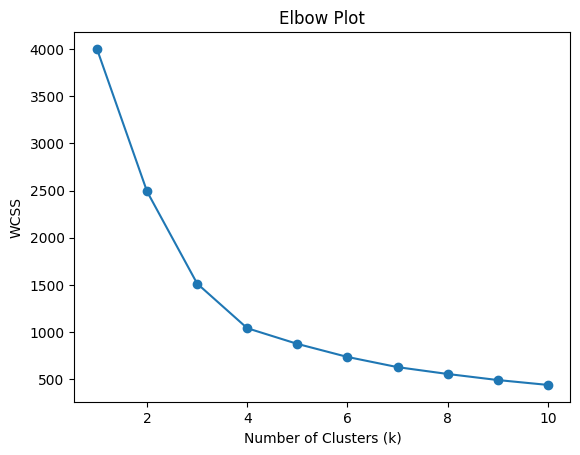

In [35]:
# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 4, n_init = 10, init = "k-means++", random_state = 42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [37]:
# Unscaled the scaled data
X = scaler.inverse_transform(X)

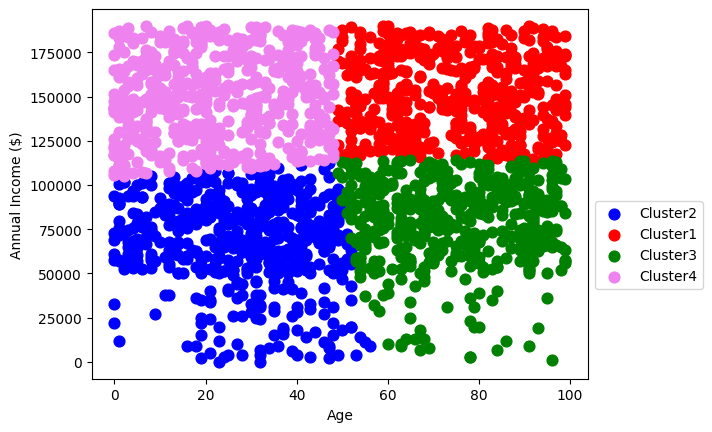

In [38]:
# Visualising the clusters
plt.scatter( X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter( X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1') 
plt.scatter( X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3') 
plt.scatter( X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4') 
plt.xlabel('Age') 
plt.ylabel('Annual Income ($)') 
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

Random Data Point Belongs to Cluster: 3


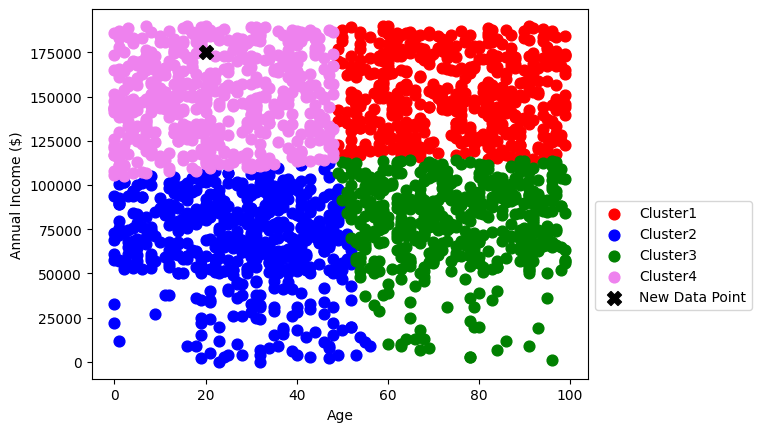

In [39]:
# Adding a new data point to the cluster

# Generate a random data point
random_data_point = np.array([[20, 175000]])

# Predict + Scale the cluster for the new data point
predicted_cluster = kmeans.predict(scaler.transform(random_data_point))

# Print the predicted cluster
print("Random Data Point Belongs to Cluster:", predicted_cluster[0])

# Visualizing the clusters with the new random data point
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=60, c='red', label='Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=60, c='blue', label='Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=60, c='green', label='Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=60, c='violet', label='Cluster4')

# Plot the new random data point
plt.scatter(random_data_point[0, 0], random_data_point[0, 1], s=100, c='black', marker='X', label='New Data Point')

plt.xlabel('Age')
plt.ylabel('Annual Income ($)')
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()


In [40]:
# Finding upper and lower bounds for the clusters
cluster_labels = kmeans.labels_

# Adding the cluster labels to original data
data_with_clusters = pd.DataFrame(df, columns=['Age', 'Annual Income ($)'])
data_with_clusters['Cluster'] = cluster_labels + 1

# Calculate max, min, and mean ages and incomes for each cluster
cluster_summary = data_with_clusters.groupby('Cluster').agg({
    'Age': ['min', 'mean', 'max'],
    'Annual Income ($)': ['min', 'mean', 'max']
})

# Round the values to the nearest 1's place
cluster_summary = cluster_summary.round()

# Display the max, min, and mean values for each cluster
print("Max, Min, and Mean Ages and Incomes for Each Cluster:")
cluster_summary.head()

Max, Min, and Mean Ages and Incomes for Each Cluster:


Age           Annual Income ($)                  
        min  mean max               min      mean     max
Cluster                                                  
1        49  75.0  99            114510  150804.0  189974
2         0  28.0  56                 0   67649.0  112247
3        49  75.0  99              1000   78168.0  114244
4         0  23.0  48            105391  149680.0  189709

Cluster 1: Affluent, older generation

Cluster 2: Sub-Affluent, younger generation

Cluster 3: Sub-Affluent, older generation

Cluster 4: Affluent, younger generation


If I were a manager for a store in the mall, I'd like to capture age and income of store shoppers, plug in the model and output the distribution to make sure our marketing strategy is catered towards the majority.